# Look at time domain of NCCFs

In [142]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.xarray
from dask.distributed import Client
import xrft
from scipy import signal
from xrsignal import xrsignal

In [7]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 32,Total memory: 62.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43185,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.80 GiB
Comm: tcp://127.0.0.1:34665,Total threads: 4
Dashboard: http://127.0.0.1:44771/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:33195,


In [4]:
fn = '/datadrive/NCCFs/1hr_20150101_20230101_ec_cc.nc'
NCCFs = xr.open_dataarray(fn)
NCCFs = NCCFs.chunk({'time':100, 'delay':11999})

time_coord = pd.date_range(pd.Timestamp('2015-01-01'), pd.Timestamp('2022-12-31T23:59:59.999999'), freq='1H')
NCCFs = NCCFs.assign_coords({'time':time_coord})

In [14]:
NCCFs_201 = NCCFs.rolling(time=201, center=True, min_periods=100).mean()[::201,:].compute()

## Arival time windows

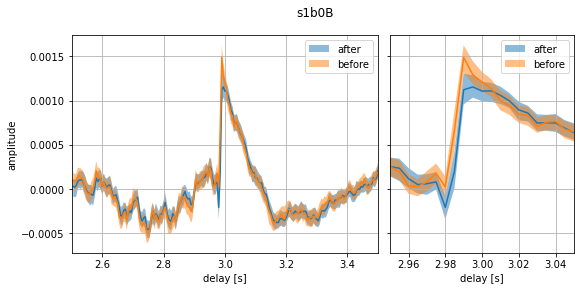

<Figure size 432x288 with 0 Axes>

In [120]:
# Create before / after figure for s1b0B
q_before = NCCFs_201.loc[pd.Timestamp('2019-01-01'):,2.5:3.5].quantile(dim='time', q=[0.25, 0.5, 0.75])
q_after = NCCFs_201.loc[:pd.Timestamp('2019-01-01'),2.5:3.5].quantile(dim='time', q=[0.25, 0.5, 0.75])

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [5, 3], 'wspace':0.05})

fig.suptitle('s1b0B')
# Plot on the left subplot
plt.sca(axs[0])
q_after[1,:].plot(ax=axs[0])
plt.fill_between(q_after.delay, q_after[0,:], q_after[2,:], alpha=0.5, label='after')
q_before[1,:].plot()
plt.fill_between(q_before.delay, q_before[0,:], q_before[2,:], alpha=0.5, label='before')
plt.grid()
plt.xlim([2.5, 3.5])
plt.legend()
plt.ylabel('amplitude')
plt.xlabel('delay [s]')
plt.title('')

plt.sca(axs[1])
q_after[1,:].plot(ax=axs[1])
plt.fill_between(q_after.delay, q_after[0,:], q_after[2,:], alpha=0.5, label='after')
q_before[1,:].plot()
plt.fill_between(q_before.delay, q_before[0,:], q_before[2,:], alpha=0.5, label='before')
plt.grid()
plt.xlim([2.95, 3.05])
plt.legend()
plt.ylabel('')
plt.xlabel('delay [s]')
plt.title('')
axs[1].set_yticklabels('')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

plt.tight_layout()

fig.savefig('figures/s1b0B_before_after.svg')

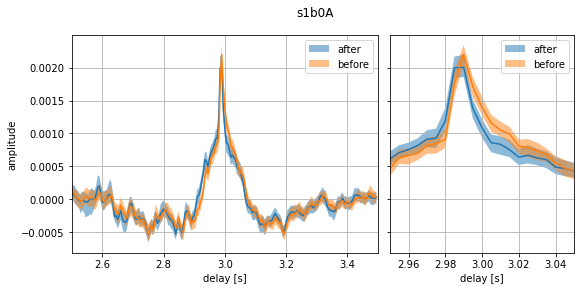

<Figure size 432x288 with 0 Axes>

In [129]:
# Create before / after figure for s1b0A
q_before = NCCFs_201.loc[pd.Timestamp('2019-01-01'):,-3.5:-2.5].quantile(dim='time', q=[0.25, 0.5, 0.75])
q_after = NCCFs_201.loc[:pd.Timestamp('2019-01-01'),-3.5:-2.5].quantile(dim='time', q=[0.25, 0.5, 0.75])

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [5, 3], 'wspace':0.05})

fig.suptitle('s1b0A')
# Plot on the left subplot
plt.sca(axs[0])
plt.plot(-1*q_after.delay, q_after[1,:])
plt.fill_between(-1*q_after.delay, q_after[0,:], q_after[2,:], alpha=0.5, label='after')
plt.plot(-1*q_before.delay, q_before[1,:])
plt.fill_between(-1*q_before.delay, q_before[0,:], q_before[2,:], alpha=0.5, label='before')
plt.grid()
plt.xlim([2.5, 3.5])
plt.legend()
plt.ylabel('amplitude')
plt.xlabel('delay [s]')
plt.title('')

plt.sca(axs[1])
plt.plot(-1*q_after.delay, q_after[1,:])
plt.fill_between(-1*q_after.delay, q_after[0,:], q_after[2,:], alpha=0.5, label='after')
plt.plot(-1*q_before.delay, q_before[1,:])
plt.fill_between(-1*q_before.delay, q_before[0,:], q_before[2,:], alpha=0.5, label='before')
plt.grid()
plt.xlim([2.95, 3.05])
plt.legend()
plt.ylabel('')
plt.xlabel('delay [s]')
plt.title('')
axs[1].set_yticklabels('')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

plt.tight_layout()

fig.savefig('figures/s1b0A_before_after.svg')

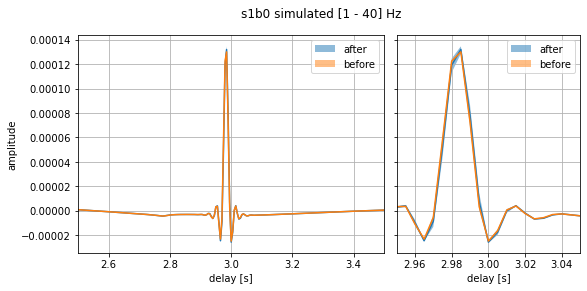

<Figure size 432x288 with 0 Axes>

In [148]:
b,a = signal.butter(4, [0.01, 0.4], btype='bandpass')
tdgfs_filt = xrsignal.filtfilt(tdgfs, dim='time', b=b, a=a)

q_before = tdgfs_filt.loc[:pd.Timestamp('2019-01-01'),2.5:3.5].quantile(dim='date', q=[0.25, 0.5, 0.75])
q_after = tdgfs_filt.loc[pd.Timestamp('2019-01-01'):,2.5:3.5].quantile(dim='date', q=[0.25, 0.5, 0.75])

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [5, 3], 'wspace':0.05})

fig.suptitle('s1b0 simulated [1 - 40] Hz')
# Plot on the left subplot
plt.sca(axs[0])
plt.plot(q_after.time, q_after[1,:])
plt.fill_between(q_after.time, q_after[0,:], q_after[2,:], alpha=0.5, label='after')
plt.plot(q_before.time, q_before[1,:])
plt.fill_between(-1*q_before.time, q_before[0,:], q_before[2,:], alpha=0.5, label='before')
plt.grid()
plt.xlim([2.5, 3.5])
plt.legend()
plt.ylabel('amplitude')
plt.xlabel('delay [s]')
plt.title('')

plt.sca(axs[1])
plt.plot(q_after.time, q_after[1,:])
plt.fill_between(q_after.time, q_after[0,:], q_after[2,:], alpha=0.5, label='after')
plt.plot(q_before.time, q_before[1,:])
plt.fill_between(-1*q_before.time, q_before[0,:], q_before[2,:], alpha=0.5, label='before')
plt.grid()
plt.xlim([2.95, 3.05])
plt.legend()
plt.ylabel('')
plt.xlabel('delay [s]')
plt.title('')
axs[1].set_yticklabels('')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

plt.tight_layout()

fig.savefig('figures/s1b0_sim_before_after.svg')

## Let's just look at simulated phase real quick

In [46]:
fn = '/datadrive/simulation/caldera_inversion_timeseries_HYCOM2.nc'
tdgfs = xr.open_dataarray(fn)

In [53]:
fdgfs_s1b0 = xrft.fft(tdgfs.loc[:,2.5:3.5], dim='time')

In [89]:
fdgfs_s1b0_a = xr.DataArray(np.unwrap(np.angle(fdgfs_s1b0),axis=0), dims=fdgfs_s1b0.dims, coords=fdgfs_s1b0.coords)

In [90]:
fdgfs_s1b0_a.loc[:,0:20].hvplot.image(x='date', rasterize=True)

:DynamicMap   []
   :Image   [date,freq_time]   (value)

In [94]:
NCCFs_s1b0A_f = xrft.fft(NCCFs_201.loc[:,-3.5:-2.5], dim='delay')
NCCFs_s1b0A_a = xr.DataArray(np.unwrap(np.angle(NCCFs_s1b0A_f),axis=0), dims=NCCFs_s1b0A_f.dims, coords=NCCFs_s1b0A_f.coords)

In [95]:
NCCFs_s1b0A_a.loc[:,0:].hvplot(x='time')

:DynamicMap   [freq_delay]
   :Curve   [time]   (value)

In [149]:
tdgfs

<xarray.DataArray 'Time Domain Greens Function' (date: 2922, time: 6000)>
array([[-1.152976e-07, -1.338963e-07, -1.170766e-07, ..., -1.310188e-07,
        -1.134697e-07, -1.323197e-07],
       [-9.707640e-08, -1.552007e-07, -9.858155e-08, ..., -1.528413e-07,
        -9.538154e-08, -1.538767e-07],
       [-7.813468e-08, -1.739705e-07, -7.943713e-08, ..., -1.704228e-07,
        -7.692414e-08, -1.725535e-07],
       ...,
       [-1.318694e-07, -1.264441e-07, -1.340104e-07, ..., -1.233040e-07,
        -1.302884e-07, -1.249905e-07],
       [-1.290902e-07, -1.297497e-07, -1.313611e-07, ..., -1.265252e-07,
        -1.273221e-07, -1.284070e-07],
       [-1.314135e-07, -1.269430e-07, -1.334395e-07, ..., -1.245387e-07,
        -1.293694e-07, -1.262343e-07]])
Coordinates:
  * date     (date) datetime64[ns] 2015-01-01 2015-01-02 ... 2022-12-31
  * time     (time) float64 0.0 0.005 0.01 0.015 0.02 ... 29.98 29.98 29.99 30.0

## Peak Spectrums

In [157]:
q_before = np.abs(xrft.fft(NCCFs_201.loc[:pd.Timestamp('2019-01-01'),-3.5:-2.5], dim='delay')).quantile(dim='time', q=[0.25, 0.5, 0.75])
q_after = np.abs(xrft.fft(NCCFs_201.loc[pd.Timestamp('2019-01-01'):,-3.5:-2.5], dim='delay')).quantile(dim='time', q=[0.25, 0.5, 0.75])

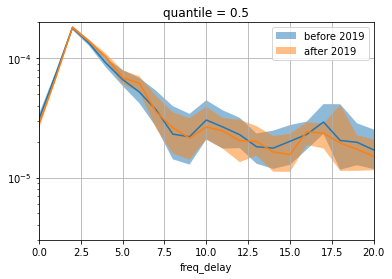

In [174]:
q_before.loc[0.5,0:].plot()
plt.fill_between(q_before.freq_delay.loc[0:], q_before.loc[0.25,0:], q_before.loc[0.75,0:], alpha=0.5, label='before 2019')

q_after.loc[0.5,0:].plot()
plt.fill_between(q_after.freq_delay.loc[0:], q_after.loc[0.25,0:], q_after.loc[0.75,0:], alpha=0.5, label='after 2019')

plt.legend()
plt.yscale('log')

plt.ylim([3e-6, 2e-4])
plt.xlim([0,20])
plt.grid()